### Importing the required libraries and reading the dataset


In [101]:
#importing the libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings  
warnings.filterwarnings('ignore')      
pd.set_option('display.max_columns', None) 

In [102]:
#reading the dataset in data variable
data = pd.read_csv('telecom_customer_churn.csv')

In [103]:
data.isnull().sum()  #checking how many nulls present in columns

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [104]:
mask = (data['Customer Status']!=('Joined')) #creating and using a mask variable to continue with customers that are churned or not
data = data[mask]

In [105]:
#data['Customer Status'] = data['Customer Status'].replace(to_replace="Joined",
          # value="Stayed")

In [106]:
data['Customer Status'].value_counts()

Stayed     4720
Churned    1869
Name: Customer Status, dtype: int64

In [107]:
data[data['Monthly Charge']<0][['Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status']]

,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
1,-4.0,542.40,38.33,10,96.21,610.28,Stayed
32,-2.0,7942.15,0.00,0,2888.82,10830.97,Stayed
170,-3.0,465.70,0.00,0,0.00,465.70,Stayed
232,-8.0,4539.60,0.00,130,0.00,4669.60,Stayed
336,-1.0,343.95,0.00,20,33.30,397.25,Churned
...,...,...,...,...,...,...,...
6894,-1.0,2192.90,0.00,0,1108.83,3301.73,Stayed
6918,-7.0,6860.60,44.00,0,2179.32,8995.92,Stayed
6976,-1.0,3640.45,0.00,0,1980.00,5620.45,Churned
7020,-1.0,2030.30,10.20,0,887.67,2907.77,Churned


In [108]:
mask = data['Monthly Charge']>0
data=data[mask]


In [109]:
data.reset_index(drop=True,inplace=True)

In [110]:
data.shape #dimensions of dataset

(6475, 38)

In [111]:
data.head()  # dataset overview

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.0,0,381.51,974.81,Stayed,NaN,NaN
1,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.0,0,134.60,415.45,Churned,Competitor,Competitor had better devices
2,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.0,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
3,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.0,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
4,0013-MHZWF,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,9,Offer E,Yes,16.77,No,Yes,Cable,73.0,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,69.4,571.45,0.0,0,150.93,722.38,Stayed,NaN,NaN


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6475 entries, 0 to 6474
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6475 non-null   object 
 1   Gender                             6475 non-null   object 
 2   Age                                6475 non-null   int64  
 3   Married                            6475 non-null   object 
 4   Number of Dependents               6475 non-null   int64  
 5   City                               6475 non-null   object 
 6   Zip Code                           6475 non-null   int64  
 7   Latitude                           6475 non-null   float64
 8   Longitude                          6475 non-null   float64
 9   Number of Referrals                6475 non-null   int64  
 10  Tenure in Months                   6475 non-null   int64  
 11  Offer                              6475 non-null   objec

In [113]:
data.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     633
Multiple Lines                        633
Internet Service                        0
Internet Type                        1320
Avg Monthly GB Download              1320
Online Security                      1320
Online Backup                        1320
Device Protection Plan               1320
Premium Tech Support                 1320
Streaming TV                         1320
Streaming Movies                  

In [114]:
# encoding these variables to create a new variable count of services
a=np.where(data['Online Security']=='Yes',1,0)
b=np.where(data['Online Backup']=='Yes',1,0)
c=np.where(data['Device Protection Plan']=='Yes',1,0)
d=np.where(data['Premium Tech Support']=='Yes',1,0)
e=np.where(data['Streaming TV']=='Yes',1,0)
f=np.where(data['Streaming Movies']=='Yes',1,0)
g=np.where(data['Streaming Music']=='Yes',1,0)

In [115]:
count=pd.DataFrame([a,b,c,d,e,f,g])

In [116]:
count = count.T
count.head(7)

,0,1,2,3,4,5,6
0,0,1,0,1,1,0,0
1,0,0,1,0,0,0,0
2,0,1,1,0,1,1,0
3,0,0,0,1,1,0,0
4,0,0,0,1,1,1,1
5,1,1,1,1,1,1,1
6,1,0,0,1,0,0,0


In [117]:
rows = len(count)
cols = count.shape[1]
rows,cols

(6475, 7)

In [118]:
sum=[]
for i in range(rows):
    s=0
    for j in range(cols):
       
        if count[j][i]==1:
            s=s+1
        else:
            continue
    sum.append(s)
        

In [119]:
count['sum']=sum
count['sum'].value_counts()

0    1851
3     856
4     825
2     807
1     727
5     674
6     485
7     250
Name: sum, dtype: int64

In [120]:
data['Count of Service'] = count['sum']
data['Count of Service'].value_counts()

0    1851
3     856
4     825
2     807
1     727
5     674
6     485
7     250
Name: Count of Service, dtype: int64

In [121]:
(data['Count of Service']==0).value_counts()

False    4624
True     1851
Name: Count of Service, dtype: int64

In [122]:
# from count of services creating a new variable use service
data['Use Service'] = data['Count of Service']==0

<AxesSubplot:xlabel='Use Service'>

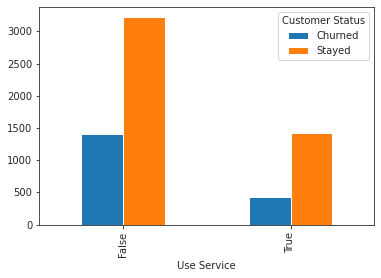

In [123]:
pd.crosstab(data['Use Service'],data['Customer Status']).plot(kind='bar')

In [124]:
data

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Count of Service,Use Service
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.0,0,381.51,974.81,Stayed,NaN,NaN,3,False
1,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.0,0,134.60,415.45,Churned,Competitor,Competitor had better devices,1,False
2,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.0,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,4,False
3,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0.0,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,2,False
4,0013-MHZWF,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,9,Offer E,Yes,16.77,No,Yes,Cable,73.0,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,69.40,571.45,0.0,0,150.93,722.38,Stayed,NaN,NaN,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6470,9986-BONCE,Female,36,No,0,Fallbrook,92028,33.362575,-117.299644,0,4,None,Yes,2.01,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Bank Withdrawal,20.95,85.50,0.0,0,8.04,93.54,Churned,Competitor,Competitor made better offer,0,True
6471,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,13,Offer D,Yes,46.68,No,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.0,0,606.84,1349.74,Stayed,NaN,NaN,3,False
6472,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,22,Offer D,Yes,16.20,Yes,Yes,Fiber Optic,17.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.0,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction,2,False
6473,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,67,Offer A,Yes,2.12,No,Yes,Cable,58.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,67.85,4627.65,0.0,0,142.04,4769.69,Stayed,NaN,NaN,5,False


<AxesSubplot:title={'center':'Total charges by count of service'}, xlabel='Count of Service', ylabel='Total Charges'>

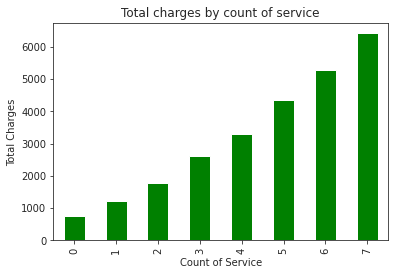

In [125]:
data.groupby(['Count of Service'])['Total Charges','Customer Status'].agg(['mean']).plot(kind='bar',color='green',title='Total charges by count of service',legend=False,ylabel='Total Charges')

<AxesSubplot:title={'center':'Customer Status by count of service'}, xlabel='Count of Service', ylabel='Customer Status'>

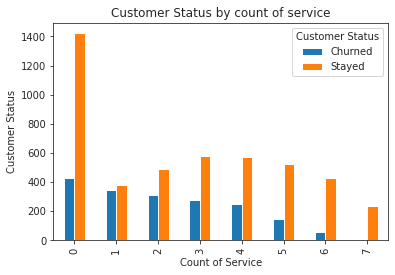

In [126]:
pd.crosstab(data['Count of Service'],data['Customer Status']).plot(kind='bar',title='Customer Status by count of service',legend=True,ylabel='Customer Status')

In [127]:
data.shape

(6475, 40)

In [128]:
data[data['Age'] > 64] ['Customer Status'].value_counts(1)

Stayed     0.571036
Churned    0.428964
Name: Customer Status, dtype: float64

In [129]:
data['Age']

0       37
1       50
2       78
3       75
4       23
        ..
6470    36
6471    20
6472    40
6473    21
6474    36
Name: Age, Length: 6475, dtype: int64

In [130]:
if ([data['Age'][3] < 64]):
         print(data['Age'][3])

75


In [131]:
Senior_Citizen = []
for i in range(len(data)):
    if (data['Age'][i] > 64) == True:
         Senior_Citizen.append('Yes')
    else:
         Senior_Citizen.append('No')


In [132]:
data['Senior_Citizen'] =Senior_Citizen
data['Senior_Citizen'].value_counts()

No     5384
Yes    1091
Name: Senior_Citizen, dtype: int64

In [133]:
data.describe()  # summary of nummerical category columns

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Count of Service
count,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,5842.000000,5155.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000
mean,46.734981,0.475676,93497.991815,36.206155,-119.762452,2.020386,34.557066,25.489938,26.228128,66.272008,2437.345103,2.058703,7.183012,799.286948,3241.756360,2.507954
std,16.838083,0.967411,1856.295883,2.473588,2.157355,3.020610,23.959012,14.204799,19.570355,29.917730,2267.655892,8.085483,25.824131,854.561590,2856.646045,2.177352
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,18.250000,18.850000,0.000000,0.000000,0.000000,21.610000,0.000000
25%,33.000000,0.000000,92106.500000,33.990085,-121.799917,0.000000,12.000000,13.160000,13.000000,40.575000,548.300000,0.000000,0.000000,107.040000,836.300000,0.000000
50%,46.000000,0.000000,93529.000000,36.276880,-119.631072,0.000000,32.000000,25.695000,21.000000,72.900000,1565.700000,0.000000,0.000000,471.750000,2388.330000,2.000000
75%,60.000000,0.000000,95335.000000,38.184748,-117.967399,3.000000,57.000000,37.690000,30.000000,90.600000,4011.600000,0.000000,0.000000,1283.715000,5116.720000,4.000000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,7.000000


In [134]:
city = pd.DataFrame(data['City'].value_counts()[:]).reset_index()
city=list(city[city['City']>50]['index'])
city

['San Diego',
 'Los Angeles',
 'San Jose',
 'Sacramento',
 'San Francisco',
 'Fresno',
 'Long Beach']

In [135]:
data['City_1']=''


In [136]:
for i in range(len(data['City'])):

    if data['City'][i] in city:
        data['City_1'][i] = data['City'][i]
    else:
        data['City_1'][i]='Other'

In [137]:
data['City_1'].value_counts()

Other            5511
San Diego         271
Los Angeles       269
San Jose          110
Sacramento        101
San Francisco      96
Fresno             60
Long Beach         57
Name: City_1, dtype: int64

In [138]:
## Imputing or Replacing Nan values according to the EDA

data['Avg Monthly GB Download'] = data['Avg Monthly GB Download'].replace(np.nan,0.0)
data['Avg Monthly Long Distance Charges'] = data['Avg Monthly Long Distance Charges'].replace(np.nan,0.0)
data['Multiple Lines'] = data['Multiple Lines'].replace(np.nan,'No phone Service')

data[['Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 
           'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music','Unlimited Data']] = data[['Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 
           'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music','Unlimited Data']].replace(np.nan,'No Internet')



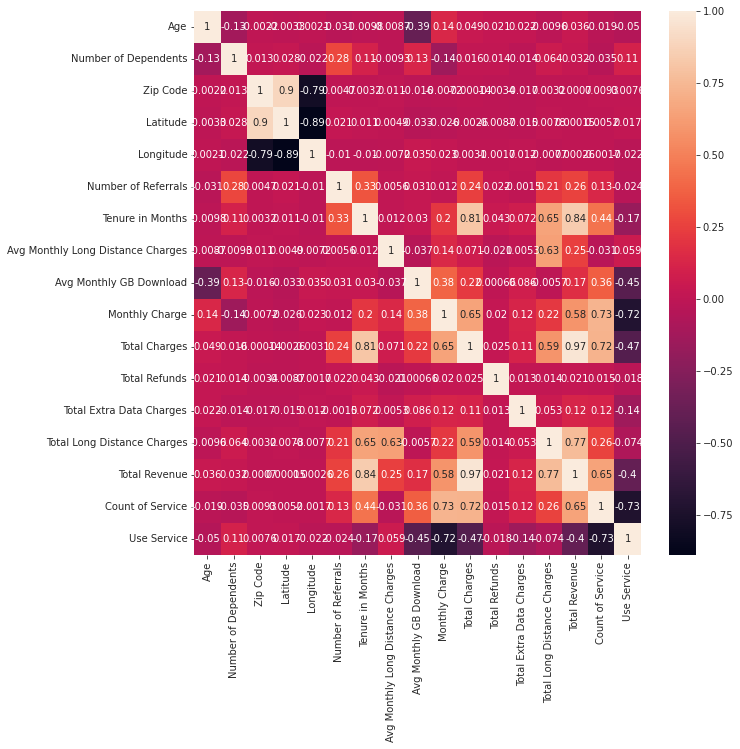

In [139]:
#Checking correlation between numerical columns

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot = True)
plt.show()

In [140]:
# dropping not required columns
data.drop(['Zip Code', 'Latitude', 'Longitude'],inplace=True,axis=1)

In [141]:
data.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason',
       'Count of Service', 'Use Service', 'Senior_Citizen', 'City_1'],
      dtype='object')

### Analysing the target variable

In [142]:
data['Customer Status'].value_counts() # count of customers churned and stayed 

Stayed     4636
Churned    1839
Name: Customer Status, dtype: int64

In [143]:
#replacing churn customer by 1 and non churners by 0

data['Churn'] = data['Customer Status'].replace('Churned',1)
data['Churn'] = data['Churn'].replace('Stayed',0)

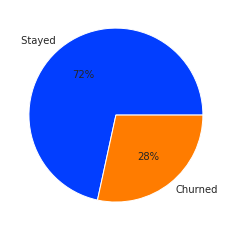

In [144]:
#data['Customer Status'].value_counts().plot(kind='pie')
palette_color = sns.color_palette('bright')
keys = [' Stayed','Churned']
plt.pie(data['Customer Status'].value_counts(), labels=keys, colors=palette_color, autopct='%.0f%%')
plt.show()

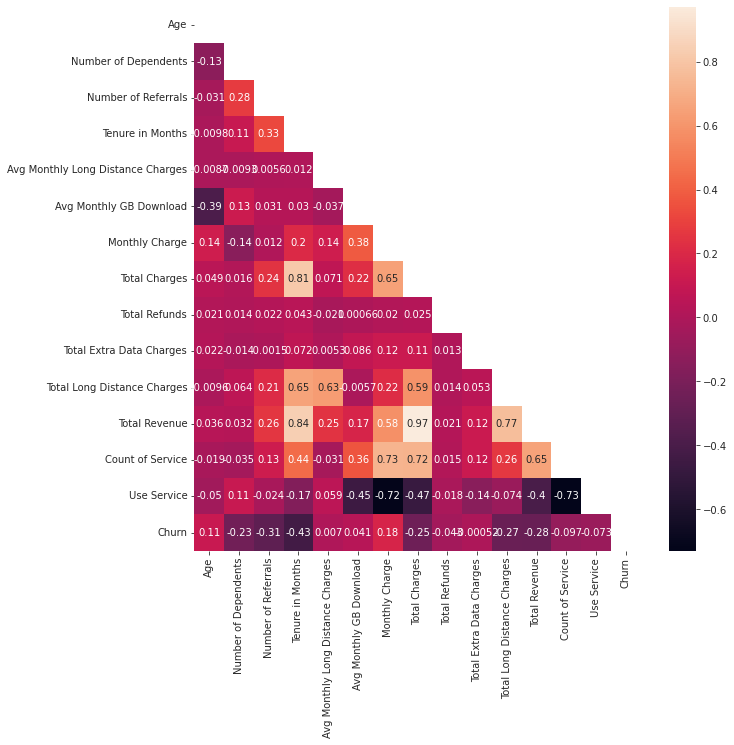

In [145]:
matrix = np.triu(data.corr())
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot = True,mask=matrix)
plt.show()

<AxesSubplot:ylabel='Churn Reason'>

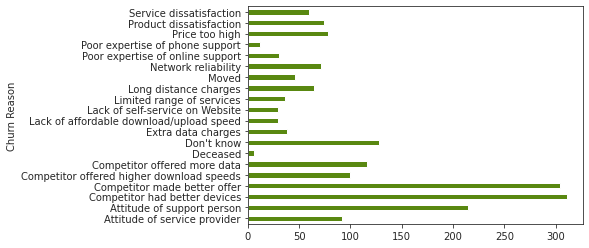

In [146]:
data.groupby(['Churn Reason'])['Age'].agg('count').plot(kind='barh',color='#598811')

In [147]:
catg_col = data.select_dtypes(include=['object']).columns
catg_col = catg_col.drop(['Customer ID','Customer Status','City',
       'Churn Category', 'Churn Reason'])
catg_col

Index(['Gender', 'Married', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Senior_Citizen', 'City_1'],
      dtype='object')

In [148]:
for i in catg_col:
    out=data[[i,'Customer Status']].pivot_table(index=i,columns='Customer Status',aggfunc=len)
    out['percentage']=out.Churned/(out.Stayed+out.Churned)
    display(out)

Customer Status,Churned,Stayed,percentage
Gender,,,
Female,922,2307,0.285537
Male,917,2329,0.282502


Customer Status,Churned,Stayed,percentage
Married,,,
No,1179,2032,0.367175
Yes,660,2604,0.202206


Customer Status,Churned,Stayed,percentage
Offer,,,
None,1032,2494,0.292683
Offer A,35,478,0.068226
Offer B,101,714,0.123926
Offer C,94,317,0.228710
Offer D,158,435,0.266442
Offer E,419,198,0.679092


Customer Status,Churned,Stayed,percentage
Phone Service,,,
No,166,467,0.262243
Yes,1673,4169,0.286375


Customer Status,Churned,Stayed,percentage
Multiple Lines,,,
No,831,2131,0.280554
No phone Service,166,467,0.262243
Yes,842,2038,0.292361


Customer Status,Churned,Stayed,percentage
Internet Service,,,
No,110,1210,0.083333
Yes,1729,3426,0.335403


Customer Status,Churned,Stayed,percentage
Internet Type,,,
Cable,209,553,0.274278
DSL,301,1204,0.200000
Fiber Optic,1219,1669,0.422091
No Internet,110,1210,0.083333


Customer Status,Churned,Stayed,percentage
Online Security,,,
No,1437,1778,0.446967
No Internet,110,1210,0.083333
Yes,292,1648,0.150515


Customer Status,Churned,Stayed,percentage
Online Backup,,,
No,1208,1611,0.428521
No Internet,110,1210,0.083333
Yes,521,1815,0.223031


Customer Status,Churned,Stayed,percentage
Device Protection Plan,,,
No,1191,1612,0.424902
No Internet,110,1210,0.083333
Yes,538,1814,0.228741


Customer Status,Churned,Stayed,percentage
Premium Tech Support,,,
No,1420,1774,0.444584
No Internet,110,1210,0.083333
Yes,309,1652,0.157573


Customer Status,Churned,Stayed,percentage
Streaming TV,,,
No,923,1615,0.363672
No Internet,110,1210,0.083333
Yes,806,1811,0.307986


Customer Status,Churned,Stayed,percentage
Streaming Movies,,,
No,920,1596,0.365660
No Internet,110,1210,0.083333
Yes,809,1830,0.306556


Customer Status,Churned,Stayed,percentage
Streaming Music,,,
No,1011,1750,0.366172
No Internet,110,1210,0.083333
Yes,718,1676,0.299916


Customer Status,Churned,Stayed,percentage
Unlimited Data,,,
No,249,463,0.349719
No Internet,110,1210,0.083333
Yes,1480,2963,0.333108


Customer Status,Churned,Stayed,percentage
Contract,,,
Month-to-Month,1625,1521,0.516529
One Year,166,1331,0.110888
Two Year,48,1784,0.026201


Customer Status,Churned,Stayed,percentage
Paperless Billing,,,
No,458,2106,0.178627
Yes,1381,2530,0.353107


Customer Status,Churned,Stayed,percentage
Payment Method,,,
Bank Withdrawal,1311,2358,0.357318
Credit Card,389,2080,0.157554
Mailed Check,139,198,0.412463


Customer Status,Churned,Stayed,percentage
Senior_Citizen,,,
No,1371,4013,0.254643
Yes,468,623,0.428964


Customer Status,Churned,Stayed,percentage
City_1,,,
Fresno,12,48,0.200000
Long Beach,14,43,0.245614
Los Angeles,77,192,0.286245
Other,1470,4041,0.266739
Sacramento,26,75,0.257426
San Diego,180,91,0.664207
San Francisco,31,65,0.322917
San Jose,29,81,0.263636


In [149]:
import seaborn as sns
sns.set_style('ticks')

<AxesSubplot:xlabel='Age', ylabel='Count'>

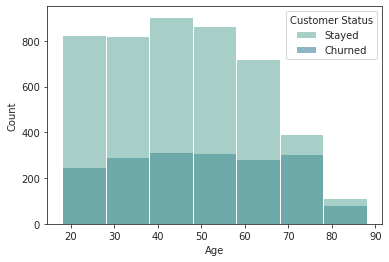

In [150]:
bins= range(18,90,10)
sns.histplot(data=data, x="Age", hue="Customer Status",bins=bins,palette = 'crest')

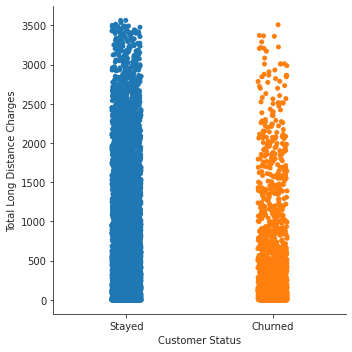

In [151]:
sns.catplot(data=data, x="Customer Status", y="Total Long Distance Charges")

In [152]:
data[['Total Charges','Total Long Distance Charges','Total Revenue']].sum()

Total Charges                  15781809.54
Total Long Distance Charges     5175382.99
Total Revenue                  20990372.43
dtype: float64

In [153]:
num_col = data.select_dtypes(include=['int','float']).columns

In [154]:
num_col = num_col.drop(['Total Extra Data Charges','Number of Dependents','Total Refunds'])


In [155]:
num_col

Index(['Age', 'Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Count of Service', 'Churn'],
      dtype='object')

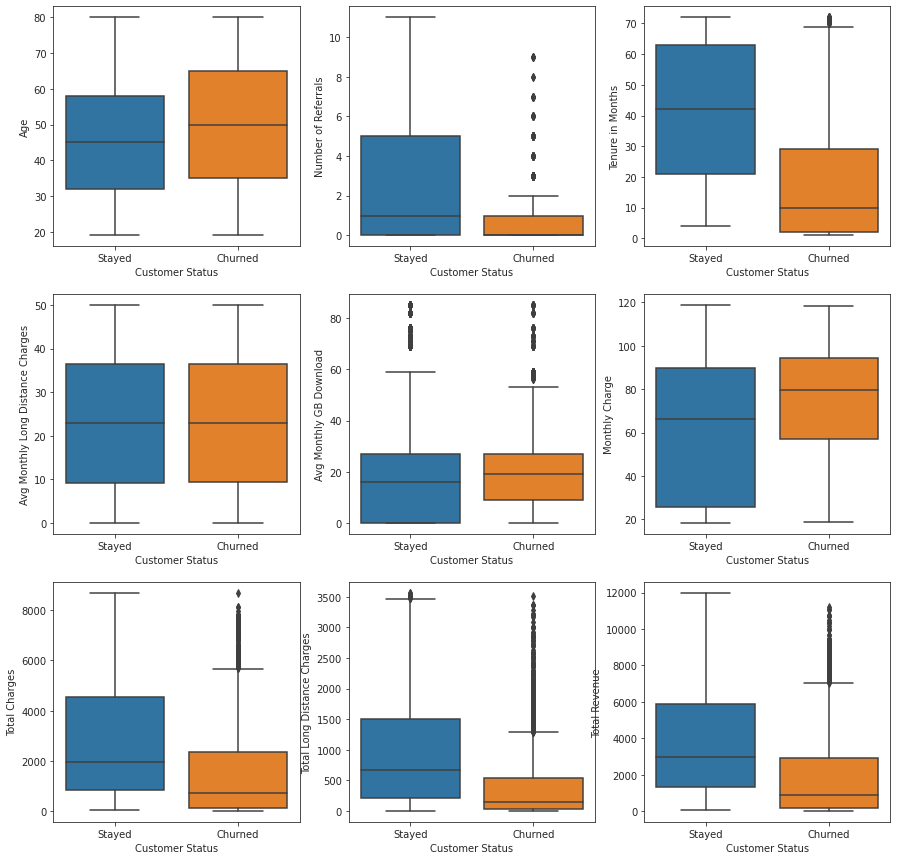

In [156]:
fig, ax = plt.subplots(3,3, figsize = (15,15))
for i, subplot in zip(num_col, ax.flatten()):
    sns.boxplot(x = 'Customer Status', y = i , data = data, ax = subplot)

In [157]:
a = data.groupby(['Avg Monthly GB Download'])['Total Charges','Total Long Distance Charges','Total Revenue'].agg(['sum','count'])

In [158]:
a

Total Charges       Total Long Distance Charges        \
                                  sum count                         sum count   
Avg Monthly GB Download                                                         
0.0                         989454.94  1320                  1150111.74  1320   
2.0                         292183.90   108                    79696.51   108   
3.0                         389395.60   125                   104887.42   125   
4.0                         293645.50   119                    79894.73   119   
5.0                         277396.30   104                    72732.19   104   
6.0                         248101.45   106                    60764.19   106   
7.0                         282645.40   108                    73285.24   108   
8.0                         284691.75   115                    89584.71   115   
9.0                         305862.55   107                    84723.78   107   
10.0                        356162.20   123                    91189.94   123   
11.0                        383809.60   133                   106761.96   133   
12.0                        354987.35   131                   111718.90   131   
13.0                        460683.30   152                   122594.54   152   
14.0                        359520.45   113                   104156.17   113   
15.0                        372303.50   124                   104749.86   124   
16.0                        437683.45   149                   112019.48   149   
17.0                        390596.95   144                   111455.92   144   
18.0                        457610.40   159                   128447.28   159   
19.0                        642101.25   211                   159422.50   211   
20.0                        439208.90   142                   124162.87   142   
21.0                        470125.90   157                   116784.86   157   
22.0                        427724.40   160                   115544.51   160   
23.0                        459775.25   169                   125657.07   169   
24.0                        449515.70   137                   124371.29   137   
25.0                        328072.75   117                    82331.01   117   
26.0                        494341.35   174                   123005.46   174   
27.0                        493100.20   187                   148044.29   187   
28.0                        401723.60   139                   118534.59   139   
29.0                        361332.75   129                   102469.09   129   
30.0                        524793.05   184                   143407.24   184   
39.0                           119.75     1                       61.46     1   
41.0                        174601.85    63                    50105.99    63   
42.0                        107780.15    44                    31993.90    44   
46.0                         52003.80    18                    10844.11    18   
47.0                        123525.05    35                    27826.57    35   
48.0                        261604.30    79                    69191.96    79   
51.0                        234280.15    86                    69717.44    86   
52.0                        273115.95   114                    75045.58   114   
53.0                        279928.00    81                    76362.85    81   
56.0                         46238.05    14                    11568.18    14   
57.0                        116072.45    34                    26315.89    34   
58.0                        111882.15    44                    25568.60    44   
59.0                        524703.10   180                   133345.03   180   
69.0                        198429.90    70                    58575.96    70   
71.0                        134985.70    39                    39602.95    39   
73.0                        240733.25    77                    63531.83    77   
75.0                         50861.40    14            

In [159]:
data

,Customer ID,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Count of Service,Use Service,Senior_Citizen,City_1,Churn
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.0,0,381.51,974.81,Stayed,NaN,NaN,3,False,No,Other,0
1,0004-TLHLJ,Male,50,No,0,Costa Mesa,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.0,0,134.60,415.45,Churned,Competitor,Competitor had better devices,1,False,No,Other,1
2,0011-IGKFF,Male,78,Yes,0,Martinez,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.0,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,4,False,Yes,Other,1
3,0013-EXCHZ,Female,75,Yes,0,Camarillo,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0.0,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,2,False,Yes,Other,1
4,0013-MHZWF,Female,23,No,3,Midpines,0,9,Offer E,Yes,16.77,No,Yes,Cable,73.0,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,69.40,571.45,0.0,0,150.93,722.38,Stayed,NaN,NaN,4,False,No,Other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6470,9986-BONCE,Female,36,No,0,Fallbrook,0,4,None,Yes,2.01,No,No,No Internet,0.0,No Internet,No Internet,No Internet,No Internet,No Internet,No Internet,No Internet,No Internet,Month-to-Month,No,Bank Withdrawal,20.95,85.50,0.0,0,8.04,93.54,Churned,Competitor,Competitor made better offer,0,True,No,Other,1
6471,9987-LUTYD,Female,20,No,0,La Mesa,0,13,Offer D,Yes,46.68,No,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.0,0,606.84,1349.74,Stayed,NaN,NaN,3,False,No,Other,0
6472,9992-RRAMN,Male,40,Yes,0,Riverbank,1,22,Offer D,Yes,16.20,Yes,Yes,Fiber Optic,17.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.0,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction,2,False,No,Other,1
6473,9993-LHIEB,Male,21,Yes,0,Solana Beach,5,67,Offer A,Yes,2.12,No,Yes,Cable,58.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,67.85,4627.65,0.0,0,142.04,4769.69,Stayed,NaN,NaN,5,False,No,Other,0


In [160]:
data = data[data['Avg Monthly GB Download']!=39]

In [161]:
data.reset_index(inplace=True,drop=True)
data

,Customer ID,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Count of Service,Use Service,Senior_Citizen,City_1,Churn
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.0,0,381.51,974.81,Stayed,NaN,NaN,3,False,No,Other,0
1,0004-TLHLJ,Male,50,No,0,Costa Mesa,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.0,0,134.60,415.45,Churned,Competitor,Competitor had better devices,1,False,No,Other,1
2,0011-IGKFF,Male,78,Yes,0,Martinez,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.0,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,4,False,Yes,Other,1
3,0013-EXCHZ,Female,75,Yes,0,Camarillo,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0.0,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,2,False,Yes,Other,1
4,0013-MHZWF,Female,23,No,3,Midpines,0,9,Offer E,Yes,16.77,No,Yes,Cable,73.0,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,69.40,571.45,0.0,0,150.93,722.38,Stayed,NaN,NaN,4,False,No,Other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6469,9986-BONCE,Female,36,No,0,Fallbrook,0,4,None,Yes,2.01,No,No,No Internet,0.0,No Internet,No Internet,No Internet,No Internet,No Internet,No Internet,No Internet,No Internet,Month-to-Month,No,Bank Withdrawal,20.95,85.50,0.0,0,8.04,93.54,Churned,Competitor,Competitor made better offer,0,True,No,Other,1
6470,9987-LUTYD,Female,20,No,0,La Mesa,0,13,Offer D,Yes,46.68,No,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.0,0,606.84,1349.74,Stayed,NaN,NaN,3,False,No,Other,0
6471,9992-RRAMN,Male,40,Yes,0,Riverbank,1,22,Offer D,Yes,16.20,Yes,Yes,Fiber Optic,17.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.0,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction,2,False,No,Other,1
6472,9993-LHIEB,Male,21,Yes,0,Solana Beach,5,67,Offer A,Yes,2.12,No,Yes,Cable,58.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,67.85,4627.65,0.0,0,142.04,4769.69,Stayed,NaN,NaN,5,False,No,Other,0


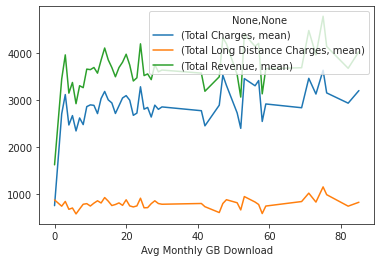

In [162]:
a = data.groupby(['Avg Monthly GB Download'])['Total Charges','Total Long Distance Charges','Total Revenue','Phone Service','Internet Service'].agg(['mean']).plot()
#a=data.groupby(['Tenure in Months']).agg(['mean','count']).plot()

In [163]:
a

<AxesSubplot:xlabel='Avg Monthly GB Download'>

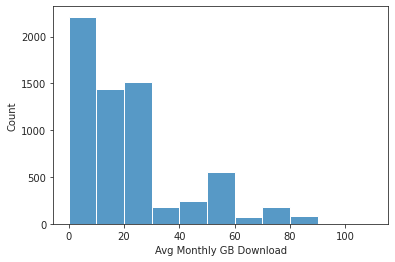

In [164]:
bins=np.arange(0,120,10)
sns.histplot(data['Avg Monthly GB Download'],bins=bins)
plt.show()

In [165]:
data

,Customer ID,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Count of Service,Use Service,Senior_Citizen,City_1,Churn
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.0,0,381.51,974.81,Stayed,NaN,NaN,3,False,No,Other,0
1,0004-TLHLJ,Male,50,No,0,Costa Mesa,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.0,0,134.60,415.45,Churned,Competitor,Competitor had better devices,1,False,No,Other,1
2,0011-IGKFF,Male,78,Yes,0,Martinez,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.0,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,4,False,Yes,Other,1
3,0013-EXCHZ,Female,75,Yes,0,Camarillo,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0.0,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,2,False,Yes,Other,1
4,0013-MHZWF,Female,23,No,3,Midpines,0,9,Offer E,Yes,16.77,No,Yes,Cable,73.0,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,69.40,571.45,0.0,0,150.93,722.38,Stayed,NaN,NaN,4,False,No,Other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6469,9986-BONCE,Female,36,No,0,Fallbrook,0,4,None,Yes,2.01,No,No,No Internet,0.0,No Internet,No Internet,No Internet,No Internet,No Internet,No Internet,No Internet,No Internet,Month-to-Month,No,Bank Withdrawal,20.95,85.50,0.0,0,8.04,93.54,Churned,Competitor,Competitor made better offer,0,True,No,Other,1
6470,9987-LUTYD,Female,20,No,0,La Mesa,0,13,Offer D,Yes,46.68,No,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.0,0,606.84,1349.74,Stayed,NaN,NaN,3,False,No,Other,0
6471,9992-RRAMN,Male,40,Yes,0,Riverbank,1,22,Offer D,Yes,16.20,Yes,Yes,Fiber Optic,17.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.0,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction,2,False,No,Other,1
6472,9993-LHIEB,Male,21,Yes,0,Solana Beach,5,67,Offer A,Yes,2.12,No,Yes,Cable,58.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,67.85,4627.65,0.0,0,142.04,4769.69,Stayed,NaN,NaN,5,False,No,Other,0


In [166]:
data.shape,data.columns

((6474, 40),
 Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
        'City', 'Number of Referrals', 'Tenure in Months', 'Offer',
        'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
        'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
        'Online Security', 'Online Backup', 'Device Protection Plan',
        'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
        'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
        'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
        'Total Extra Data Charges', 'Total Long Distance Charges',
        'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason',
        'Count of Service', 'Use Service', 'Senior_Citizen', 'City_1', 'Churn'],
       dtype='object'))

In [167]:
data.drop(['Total Revenue'],axis=1,inplace=True) #features are highly correlated

In [168]:
data.shape

(6474, 39)

In [169]:
data['Total Charges'].describe()

count    6474.000000
mean     2437.703088
std      2267.648064
min        18.850000
25%       548.825000
50%      1566.225000
75%      4012.800000
max      8684.800000
Name: Total Charges, dtype: float64

### Data modelling preparating

In [170]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn import metrics

In [171]:
model_data = data.copy()
model_data.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Customer Status', 'Churn Category', 'Churn Reason', 'Count of Service',
       'Use Service', 'Senior_Citizen', 'City_1', 'Churn'],
      dtype='object')

In [172]:
## dropping not required columns

model_data.drop(['Customer ID','Customer Status','City','City_1','Churn Category','Churn Reason'],axis=1,inplace=True)
model_data.shape

(6474, 33)

In [173]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6474 entries, 0 to 6473
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             6474 non-null   object 
 1   Age                                6474 non-null   int64  
 2   Married                            6474 non-null   object 
 3   Number of Dependents               6474 non-null   int64  
 4   Number of Referrals                6474 non-null   int64  
 5   Tenure in Months                   6474 non-null   int64  
 6   Offer                              6474 non-null   object 
 7   Phone Service                      6474 non-null   object 
 8   Avg Monthly Long Distance Charges  6474 non-null   float64
 9   Multiple Lines                     6474 non-null   object 
 10  Internet Service                   6474 non-null   object 
 11  Internet Type                      6474 non-null   objec

In [174]:
ohe = OneHotEncoder(categories='auto',drop='first',sparse=True,handle_unknown='error')
transformed = ohe.fit_transform(model_data[['Gender','Married','Offer','Phone Service','Multiple Lines',
       'Internet Service', 'Internet Type','Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music','Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method','Senior_Citizen','Use Service']])



In [175]:
feature_labels = ohe.get_feature_names(['Gender','Married','Offer','Phone Service','Multiple Lines',
       'Internet Service', 'Internet Type','Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music','Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method','Senior_Citizen','Use Service'])
feature_labels


array(['Gender_Male', 'Married_Yes', 'Offer_Offer A', 'Offer_Offer B',
       'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E',
       'Phone Service_Yes', 'Multiple Lines_No phone Service',
       'Multiple Lines_Yes', 'Internet Service_Yes', 'Internet Type_DSL',
       'Internet Type_Fiber Optic', 'Internet Type_No Internet',
       'Online Security_No Internet', 'Online Security_Yes',
       'Online Backup_No Internet', 'Online Backup_Yes',
       'Device Protection Plan_No Internet', 'Device Protection Plan_Yes',
       'Premium Tech Support_No Internet', 'Premium Tech Support_Yes',
       'Streaming TV_No Internet', 'Streaming TV_Yes',
       'Streaming Movies_No Internet', 'Streaming Movies_Yes',
       'Streaming Music_No Internet', 'Streaming Music_Yes',
       'Unlimited Data_No Internet', 'Unlimited Data_Yes',
       'Contract_One Year', 'Contract_Two Year', 'Paperless Billing_Yes',
       'Payment Method_Credit Card', 'Payment Method_Mailed Check',
       'Senior_Citizen_Ye

In [176]:
encoder_df = pd.DataFrame((transformed).toarray(),columns = feature_labels)
encoder_df

,Gender_Male,Married_Yes,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Phone Service_Yes,Multiple Lines_No phone Service,Multiple Lines_Yes,Internet Service_Yes,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_No Internet,Online Security_No Internet,Online Security_Yes,Online Backup_No Internet,Online Backup_Yes,Device Protection Plan_No Internet,Device Protection Plan_Yes,Premium Tech Support_No Internet,Premium Tech Support_Yes,Streaming TV_No Internet,Streaming TV_Yes,Streaming Movies_No Internet,Streaming Movies_Yes,Streaming Music_No Internet,Streaming Music_Yes,Unlimited Data_No Internet,Unlimited Data_Yes,Contract_One Year,Contract_Two Year,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check,Senior_Citizen_Yes,Use Service_True
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6470,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6471,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6472,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [177]:
model_data = pd.concat([model_data,encoder_df],axis=1)

In [178]:
model_data.shape

(6474, 70)

In [179]:
model_data = model_data.drop(['Gender','Married','Offer','Phone Service','Multiple Lines',
       'Internet Service', 'Internet Type','Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music','Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method','Senior_Citizen','Use Service'],axis=1)
model_data.shape

(6474, 50)

In [180]:
model_data.isnull().sum()


Age                                   0
Number of Dependents                  0
Number of Referrals                   0
Tenure in Months                      0
Avg Monthly Long Distance Charges     0
Avg Monthly GB Download               0
Monthly Charge                        0
Total Charges                         0
Total Refunds                         0
Total Extra Data Charges              0
Total Long Distance Charges           0
Count of Service                      0
Churn                                 0
Gender_Male                           0
Married_Yes                           0
Offer_Offer A                         0
Offer_Offer B                         0
Offer_Offer C                         0
Offer_Offer D                         0
Offer_Offer E                         0
Phone Service_Yes                     0
Multiple Lines_No phone Service       0
Multiple Lines_Yes                    0
Internet Service_Yes                  0
Internet Type_DSL                     0


### Scaling

In [181]:
from sklearn.preprocessing import MinMaxScaler

In [182]:
scaler = MinMaxScaler()
scaler.fit(model_data)

MinMaxScaler()

In [183]:
scaled_data = scaler.transform(model_data)

In [184]:
model_data = pd.DataFrame(scaled_data,columns=model_data.columns)

In [185]:
model_data.describe()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Count of Service,Churn,Gender_Male,Married_Yes,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Phone Service_Yes,Multiple Lines_No phone Service,Multiple Lines_Yes,Internet Service_Yes,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_No Internet,Online Security_No Internet,Online Security_Yes,Online Backup_No Internet,Online Backup_Yes,Device Protection Plan_No Internet,Device Protection Plan_Yes,Premium Tech Support_No Internet,Premium Tech Support_Yes,Streaming TV_No Internet,Streaming TV_Yes,Streaming Movies_No Internet,Streaming Movies_Yes,Streaming Music_No Internet,Streaming Music_Yes,Unlimited Data_No Internet,Unlimited Data_Yes,Contract_One Year,Contract_Two Year,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check,Senior_Citizen_Yes,Use Service_True
count,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000
mean,0.454724,0.052861,0.183700,0.472706,0.460029,0.245629,0.477827,0.279122,0.041354,0.047894,0.224253,0.358312,0.283905,0.501390,0.504171,0.079240,0.125888,0.063485,0.091597,0.095304,0.902224,0.097776,0.444856,0.796108,0.232468,0.445938,0.203892,0.203892,0.299660,0.203892,0.360828,0.203892,0.363299,0.203892,0.302904,0.203892,0.404232,0.203892,0.407631,0.203892,0.369632,0.203892,0.686129,0.231233,0.282978,0.604109,0.381372,0.052054,0.168520,0.285913
std,0.276023,0.107496,0.274613,0.337429,0.309509,0.240124,0.297712,0.261673,0.162403,0.172173,0.239732,0.311063,0.450926,0.500037,0.500021,0.270134,0.331749,0.243852,0.288479,0.293657,0.297034,0.297034,0.496988,0.402921,0.422439,0.497107,0.402921,0.402921,0.458144,0.402921,0.480278,0.402921,0.480987,0.402921,0.459550,0.402921,0.490781,0.402921,0.491432,0.402921,0.482742,0.402921,0.464100,0.421653,0.450481,0.489079,0.485761,0.222154,0.374357,0.451883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.229508,0.000000,0.000000,0.154930,0.184487,0.047059,0.222015,0.061156,0.000000,0.000000,0.030038,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.442623,0.000000,0.000000,0.436620,0.458792,0.200000,0.543781,0.178558,0.000000,0.000000,0.132346,0.285714,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.672131,0.000000,0.272727,0.788732,0.728696,0.317647,0.719900,0.460878,0.0000

### modelling

In [186]:
Y=model_data['Churn']
Y.shape


(6474,)

In [189]:
#uncomment this after running whole notebook to decrease number of columns
#colsRequired = features_important['Features'][:7]
#colsRequired = (colsRequired)[:19]
#colsRequired

In [190]:
X=model_data.drop('Churn',axis=1)
#X=model_data[colsRequired]
X.shape

(6474, 49)

In [191]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, random_state=42,stratify=Y)

In [192]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5179, 49)
(1295, 49)
(5179,)
(1295,)


#### Logistic baseline model

In [193]:
lr = LogisticRegression()

In [194]:
lr.fit(x_train,y_train)

LogisticRegression()

In [195]:
y_train_pred = lr.predict(x_train)

In [196]:
y_test_pred = lr.predict(x_test)

In [197]:
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.precision_score(y_train,y_train_pred))
print(metrics.recall_score(y_train,y_train_pred))
print(metrics.f1_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_test,y_test_pred))
print(metrics.precision_score(y_test,y_test_pred))
print(metrics.recall_score(y_test,y_test_pred))
print(metrics.f1_score(y_test,y_test_pred))

0.8611701100598571
0.7657466383581033
0.7360544217687075
0.7506070065903573
0.8471042471042471
0.7456647398843931
0.7010869565217391
0.7226890756302521


In [198]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90      3709
         1.0       0.77      0.74      0.75      1470

    accuracy                           0.86      5179
   macro avg       0.83      0.82      0.83      5179
weighted avg       0.86      0.86      0.86      5179



In [199]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89       927
         1.0       0.75      0.70      0.72       368

    accuracy                           0.85      1295
   macro avg       0.81      0.80      0.81      1295
weighted avg       0.84      0.85      0.85      1295



In [200]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score



scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           ' recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}





cv = KFold(n_splits=5, random_state=1, shuffle=True)



scores = cross_validate(LogisticRegression(), x_test, y_test, scoring=scoring, cv=cv, n_jobs=-1)
# report performance
#print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores

{'fit_time': array([0.13901019, 0.19360423, 0.11862826, 0.09567881, 0.09929037]),
 'score_time': array([0.01135778, 0.06275845, 0.01060629, 0.08115864, 0.0080986 ]),
 'test_accuracy': array([0.85714286, 0.83783784, 0.84555985, 0.81081081, 0.84169884]),
 'test_precision': array([0.81578947, 0.71929825, 0.74193548, 0.66216216, 0.72222222]),
 'test_ recall': array([0.72941176, 0.6119403 , 0.65714286, 0.67123288, 0.71232877]),
 'test_f1_score': array([0.77018634, 0.66129032, 0.6969697 , 0.66666667, 0.71724138])}

#### Random forest classifier base model

In [201]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [202]:
y_train_pred = rfc.predict(x_train)
y_test_pred = rfc.predict(x_test)

In [203]:
confusion_matrix(y_train,y_train_pred)

array([[3709,    0],
       [   0, 1470]])

In [204]:
confusion_matrix(y_test, y_test_pred)

array([[874,  53],
       [120, 248]])

In [205]:
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.precision_score(y_train,y_train_pred))
print(metrics.recall_score(y_train,y_train_pred))
print(metrics.f1_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_test,y_test_pred))
print(metrics.precision_score(y_test,y_test_pred))
print(metrics.recall_score(y_test,y_test_pred))
print(metrics.f1_score(y_test,y_test_pred))

1.0
1.0
1.0
1.0
0.8664092664092664
0.8239202657807309
0.6739130434782609
0.7414050822122571


In [206]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91       927
         1.0       0.82      0.67      0.74       368

    accuracy                           0.87      1295
   macro avg       0.85      0.81      0.83      1295
weighted avg       0.86      0.87      0.86      1295



In [207]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score



scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           ' recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}





cv = KFold(n_splits=5, random_state=1, shuffle=True)



scores = cross_validate(LogisticRegression(), x_test, y_test, scoring=scoring, cv=cv, n_jobs=-1)
# report performance
# print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores

{'fit_time': array([0.16975188, 0.10740638, 0.17425227, 0.10425377, 0.09073162]),
 'score_time': array([0.00687218, 0.0095768 , 0.00733519, 0.01210833, 0.00716472]),
 'test_accuracy': array([0.85714286, 0.83783784, 0.84555985, 0.81081081, 0.84169884]),
 'test_precision': array([0.81578947, 0.71929825, 0.74193548, 0.66216216, 0.72222222]),
 'test_ recall': array([0.72941176, 0.6119403 , 0.65714286, 0.67123288, 0.71232877]),
 'test_f1_score': array([0.77018634, 0.66129032, 0.6969697 , 0.66666667, 0.71724138])}

#### Decision tree Classifier base model

In [208]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [209]:
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

In [210]:
confusion_matrix(y_train,y_train_pred)

array([[3709,    0],
       [   0, 1470]])

In [211]:
confusion_matrix(y_test, y_test_pred)

array([[793, 134],
       [118, 250]])

In [212]:
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.precision_score(y_train,y_train_pred))
print(metrics.recall_score(y_train,y_train_pred))
print(metrics.f1_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_test,y_test_pred))
print(metrics.precision_score(y_test,y_test_pred))
print(metrics.recall_score(y_test,y_test_pred))
print(metrics.f1_score(y_test,y_test_pred))

1.0
1.0
1.0
1.0
0.8054054054054054
0.6510416666666666
0.6793478260869565
0.6648936170212767


In [213]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86       927
         1.0       0.65      0.68      0.66       368

    accuracy                           0.81      1295
   macro avg       0.76      0.77      0.76      1295
weighted avg       0.81      0.81      0.81      1295



In [214]:
from sklearn.metrics import roc_curve,auc

In [215]:
clf = [
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier()
    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:
        
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, alg.predict_proba(x_test)[:,1])
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(x_train, y_train), 5)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(x_test, y_test), 5)
    clf_compare.loc[row_index, 'Precision'] = round(precision_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'f1_score'] = round(f1_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'AUC'] = round(auc(fp, tp),5)

    row_index+=1
    
clf_compare.sort_values(by = ['f1_score'], ascending = False, inplace = True)    
clf_compare

,Train Accuracy,Test Accuracy,Precision,Recall,f1_score,AUC
1,1.00000,0.87259,0.84175,0.67935,0.75188,0.93151
0,0.86117,0.84710,0.74566,0.70109,0.72269,0.91787
2,1.00000,0.80309,0.64450,0.68478,0.66403,0.76742


#### Logistic Tune model

In [216]:
lr = LogisticRegression(solver='lbfgs',penalty='l2',max_iter=1000)

In [217]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [218]:
y_train_pred = lr.predict(x_train)

In [219]:
y_test_pred = lr.predict(x_test)

In [220]:
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.precision_score(y_train,y_train_pred))
print(metrics.recall_score(y_train,y_train_pred))
print(metrics.f1_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_test,y_test_pred))
print(metrics.precision_score(y_test,y_test_pred))
print(metrics.recall_score(y_test,y_test_pred))
print(metrics.f1_score(y_test,y_test_pred))

0.8611701100598571
0.7657466383581033
0.7360544217687075
0.7506070065903573
0.8471042471042471
0.7456647398843931
0.7010869565217391
0.7226890756302521


In [221]:
from sklearn.metrics import roc_curve, auc

In [222]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90      3709
         1.0       0.77      0.74      0.75      1470

    accuracy                           0.86      5179
   macro avg       0.83      0.82      0.83      5179
weighted avg       0.86      0.86      0.86      5179



In [223]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89       927
         1.0       0.75      0.70      0.72       368

    accuracy                           0.85      1295
   macro avg       0.81      0.80      0.81      1295
weighted avg       0.84      0.85      0.85      1295



In [224]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score



scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           ' recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}





cv = KFold(n_splits=5, random_state=1, shuffle=True)



scores = cross_validate(LogisticRegression(), x_test, y_test, scoring=scoring, cv=cv, n_jobs=-1)
# report performance
# print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores

{'fit_time': array([0.08169198, 0.10247016, 0.10250163, 0.09851384, 0.08987236]),
 'score_time': array([0.00673914, 0.00826168, 0.08163285, 0.01616216, 0.00944924]),
 'test_accuracy': array([0.85714286, 0.83783784, 0.84555985, 0.81081081, 0.84169884]),
 'test_precision': array([0.81578947, 0.71929825, 0.74193548, 0.66216216, 0.72222222]),
 'test_ recall': array([0.72941176, 0.6119403 , 0.65714286, 0.67123288, 0.71232877]),
 'test_f1_score': array([0.77018634, 0.66129032, 0.6969697 , 0.66666667, 0.71724138])}

#### Random forest classifier tune model

In [225]:
rfc = RandomForestClassifier(max_depth=20, min_samples_leaf=0.01, n_estimators=1000,class_weight={0:2.5, 1: 5})
rfc.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 2.5, 1: 5}, max_depth=20,
                       min_samples_leaf=0.01, n_estimators=1000)

In [226]:
y_train_pred = rfc.predict(x_train)
y_test_pred = rfc.predict(x_test)

In [227]:
confusion_matrix(y_train,y_train_pred)

array([[3298,  411],
       [ 283, 1187]])

In [228]:
confusion_matrix(y_test, y_test_pred)

array([[831,  96],
       [ 77, 291]])

In [229]:
print(metrics.precision_score(y_train,y_train_pred))
print(metrics.recall_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.precision_score(y_test,y_test_pred))
print(metrics.recall_score(y_test,y_test_pred))
print(metrics.accuracy_score(y_test,y_test_pred))
print(metrics.f1_score(y_test,y_test_pred))

0.7428035043804756
0.8074829931972789
0.8659972967754392
0.751937984496124
0.7907608695652174
0.8664092664092664
0.770860927152318


In [230]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90      3709
         1.0       0.74      0.81      0.77      1470

    accuracy                           0.87      5179
   macro avg       0.83      0.85      0.84      5179
weighted avg       0.87      0.87      0.87      5179



In [231]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       927
         1.0       0.75      0.79      0.77       368

    accuracy                           0.87      1295
   macro avg       0.83      0.84      0.84      1295
weighted avg       0.87      0.87      0.87      1295



In [232]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score



scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           ' recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}





cv = KFold(n_splits=5, random_state=1, shuffle=True)



scores = cross_validate(LogisticRegression(), x_test, y_test, scoring=scoring, cv=cv, n_jobs=-1)
# report performance
# print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores

{'fit_time': array([0.06996107, 0.09892678, 0.10501242, 0.10620308, 0.09922624]),
 'score_time': array([0.00688553, 0.00853276, 0.08303571, 0.00826263, 0.08201647]),
 'test_accuracy': array([0.85714286, 0.83783784, 0.84555985, 0.81081081, 0.84169884]),
 'test_precision': array([0.81578947, 0.71929825, 0.74193548, 0.66216216, 0.72222222]),
 'test_ recall': array([0.72941176, 0.6119403 , 0.65714286, 0.67123288, 0.71232877]),
 'test_f1_score': array([0.77018634, 0.66129032, 0.6969697 , 0.66666667, 0.71724138])}

### Decision tree Classifier tuned model

In [233]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42,max_depth= 6, max_features= 0.6, min_samples_leaf= 0.02,class_weight={0:0.35,1:0.68})
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.68}, max_depth=6,
                       max_features=0.6, min_samples_leaf=0.02,
                       random_state=42)

In [234]:
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

In [235]:
confusion_matrix(y_train,y_train_pred)

array([[3077,  632],
       [ 280, 1190]])

In [236]:
confusion_matrix(y_test, y_test_pred)

array([[767, 160],
       [ 71, 297]])

In [237]:
print(metrics.precision_score(y_train,y_train_pred))
print(metrics.recall_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.precision_score(y_test,y_test_pred))
print(metrics.recall_score(y_test,y_test_pred))
print(metrics.accuracy_score(y_test,y_test_pred))
print(metrics.f1_score(y_test,y_test_pred))

0.6531284302963776
0.8095238095238095
0.8239042286155629
0.649890590809628
0.8070652173913043
0.8216216216216217
0.7200000000000001


In [238]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.83      0.87      3709
         1.0       0.65      0.81      0.72      1470

    accuracy                           0.82      5179
   macro avg       0.78      0.82      0.80      5179
weighted avg       0.84      0.82      0.83      5179



In [249]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.83      0.87       927
         1.0       0.65      0.81      0.72       368

    accuracy                           0.82      1295
   macro avg       0.78      0.82      0.79      1295
weighted avg       0.84      0.82      0.83      1295



In [250]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score



scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           ' recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}





cv = KFold(n_splits=5, random_state=1, shuffle=True)



scores = cross_validate(LogisticRegression(), x_test, y_test, scoring=scoring, cv=cv, n_jobs=-1)
# report performance
# print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores

{'fit_time': array([0.07833529, 0.10279608, 0.10735583, 0.09427881, 0.02639985]),
 'score_time': array([0.00728488, 0.0830586 , 0.01607561, 0.07796121, 0.07735968]),
 'test_accuracy': array([0.85714286, 0.83783784, 0.84555985, 0.81081081, 0.84169884]),
 'test_precision': array([0.81578947, 0.71929825, 0.74193548, 0.66216216, 0.72222222]),
 'test_ recall': array([0.72941176, 0.6119403 , 0.65714286, 0.67123288, 0.71232877]),
 'test_f1_score': array([0.77018634, 0.66129032, 0.6969697 , 0.66666667, 0.71724138])}

In [251]:
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [252]:
clf = [
    LogisticRegression(solver='newton-cg',penalty='l2',max_iter=1000),
    RandomForestClassifier(max_depth=20, min_samples_leaf=0.01, n_estimators=1000,class_weight={0:2.5, 1: 4.8}),
    DecisionTreeClassifier(random_state=42,max_depth= 6, max_features= 0.6, min_samples_leaf= 0.01,class_weight={0:.25,1:.75})
    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:
        
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, alg.predict_proba(x_test)[:,1])
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(x_train, y_train), 5)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(x_test, y_test), 5)
    clf_compare.loc[row_index, 'Precision'] = round(precision_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'f1_score'] = round(f1_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'AUC'] = round(auc(fp, tp),5)

    row_index+=1
    
clf_compare.sort_values(by = ['f1_score'], ascending = False, inplace = True)    
clf_compare

,Train Accuracy,Test Accuracy,Precision,Recall,f1_score,AUC
1,0.86793,0.87104,0.76517,0.78804,0.77644,0.93200
2,0.84534,0.85019,0.70616,0.80978,0.75443,0.91431
0,0.86117,0.84710,0.74566,0.70109,0.72269,0.91786


In [253]:
show_woe = True
iv_bins = 10
iv_threshold = .20
target='Churn'
################################ Functions #############################################################
def iv_woe(data, target, iv_bins,iv_threshold, show_woe):
    
    #Inputs
    # data - Input Data including target variable
    # target - Target Variable name
    # iv_bins - Number of iv_bins
    # show_woe - show all the iv_bins and features
    # iv_threshold - select features with IV greater than this
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], iv_bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
# Calculate the number of events in each group (bin)
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        
        # Calculate % of events in each group.
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
# Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
# Calculate WOE by taking natural log of division of %
        # of non-events and % of events
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
#         print("Information value of " + ivars + " is " +
#               str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars],
                            "IV" : [d['IV'].sum()]},
                           columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)
#Show WOE Table
#         if show_woe == True:
#             print(d)
    
    # Aggregate IV at feature level
    woeDF_v2 = pd.DataFrame(woeDF.groupby('Variable')['IV'].agg('sum'),
                            columns= ['IV']).reset_index()
#     woeDF_v3 = woeDF_v2.sort_values(['IV'], ascending = False)
#     IV_df = woeDF_v2#[woeDF_v2['IV']> iv_threshold]
#     woe_top_features = IV_df['Variable'].tolist()
#     print(woe_top_features)
#     woe_top_features_df = pd.DataFrame(woe_top_features,columns = ['Feature'])
#     woe_top_features_df['Method'] = 'Information_value'
    return woeDF_v2#newDF, woeDF,IV_df, woe_top_features_df



################################ Calculate IV #############################################################



woeDF = iv_woe(model_data,
                                              'Churn',iv_bins,iv_threshold,
                                              show_woe)
woeDF.head(n=50)



colsRequired=list(woeDF[woeDF['IV']> 0.3 ].Variable)

In [254]:
colsRequired,len(colsRequired)

(['Contract_Two Year',
  'Count of Service',
  'Device Protection Plan_No Internet',
  'Internet Service_Yes',
  'Internet Type_Fiber Optic',
  'Internet Type_No Internet',
  'Monthly Charge',
  'Number of Dependents',
  'Number of Referrals',
  'Offer_Offer E',
  'Online Backup_No Internet',
  'Online Security_No Internet',
  'Premium Tech Support_No Internet',
  'Streaming Movies_No Internet',
  'Streaming Music_No Internet',
  'Streaming TV_No Internet',
  'Tenure in Months',
  'Total Charges',
  'Total Long Distance Charges',
  'Unlimited Data_No Internet'],
 20)

In [255]:
woeDF.sort_values('IV',ascending=False)

,Variable,IV
41,Tenure in Months,1.571418
4,Contract_Two Year,1.129762
18,Number of Referrals,1.046956
44,Total Long Distance Charges,0.829647
42,Total Charges,0.752406
17,Number of Dependents,0.501602
11,Internet Type_Fiber Optic,0.378509
23,Offer_Offer E,0.350107
32,Premium Tech Support_No Internet,0.344669
26,Online Security_No Internet,0.344669


In [256]:
woeDF = woeDF.sort_values('IV',ascending=False)
woeDF=woeDF[:19]
woeDF


,Variable,IV
41,Tenure in Months,1.571418
4,Contract_Two Year,1.129762
18,Number of Referrals,1.046956
44,Total Long Distance Charges,0.829647
42,Total Charges,0.752406
17,Number of Dependents,0.501602
11,Internet Type_Fiber Optic,0.378509
23,Offer_Offer E,0.350107
32,Premium Tech Support_No Internet,0.344669
26,Online Security_No Internet,0.344669


<BarContainer object of 19 artists>

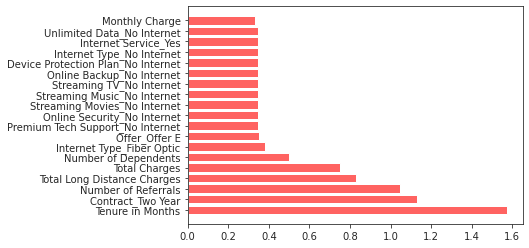

In [257]:
plt.barh(woeDF['Variable'],woeDF['IV'],color='#ff6361')
#ax.setxticklabels('Top 20 most important features by IV values')

In [258]:
a = woeDF[ (woeDF.IV >=.30) & (woeDF.IV<=2)]
colsRequired= a
colsRequired = list(colsRequired.Variable)
colsRequired

['Tenure in Months',
 'Contract_Two Year',
 'Number of Referrals',
 'Total Long Distance Charges',
 'Total Charges',
 'Number of Dependents',
 'Internet Type_Fiber Optic',
 'Offer_Offer E',
 'Premium Tech Support_No Internet',
 'Online Security_No Internet',
 'Streaming Movies_No Internet',
 'Streaming Music_No Internet',
 'Streaming TV_No Internet',
 'Online Backup_No Internet',
 'Device Protection Plan_No Internet',
 'Internet Type_No Internet',
 'Internet Service_Yes',
 'Unlimited Data_No Internet',
 'Monthly Charge']

In [259]:
from sklearn.metrics import roc_curve, auc
probas1_ = lr.predict_proba(x_test)
probas2_ = rfc.predict_proba(x_test) 
probas3_ = dt.predict_proba(x_test)


In [260]:
# Compute ROC curve and area the curve for logistic
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1_[:, 1])
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curve : %f" % roc_auc1)


Area under the ROC curve : 0.917857


In [261]:
# Compute ROC curve and area the curve for Random forest
fpr2, tpr2, thresholds2 = roc_curve(y_test, probas2_[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print("Area under the ROC curve : %f" % roc_auc2)


Area under the ROC curve : 0.931209


In [262]:
# Compute ROC curve and area the curve for Decision tree
fpr3, tpr3, thresholds3 = roc_curve(y_test, probas3_[:, 1])
roc_auc3 = auc(fpr3, tpr3)
print("Area under the ROC curve : %f" % roc_auc3)


Area under the ROC curve : 0.907261


<Figure size 432x288 with 0 Axes>

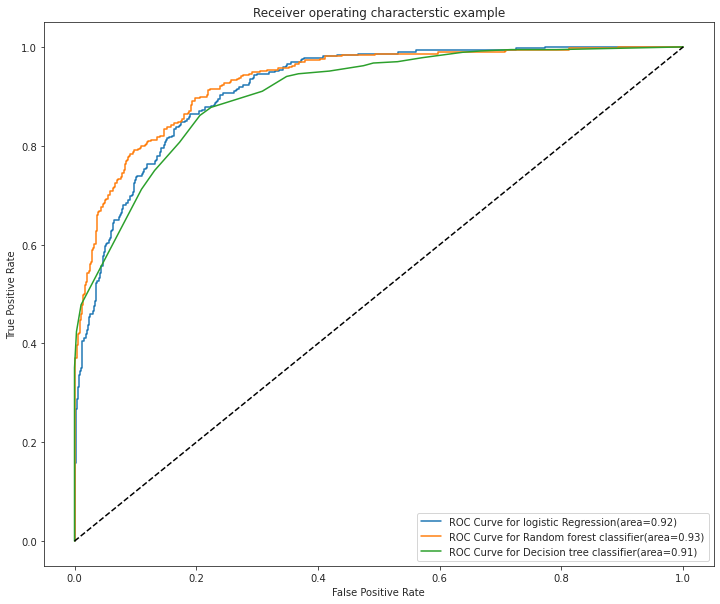

In [263]:
import pylab as pl
pl.clf()
pl.figure(figsize=[12,10])
pl.plot(fpr1,tpr1,label="ROC Curve for logistic Regression(area=%0.2f)"% roc_auc1)
pl.plot(fpr2,tpr2,label="ROC Curve for Random forest classifier(area=%0.2f)"%roc_auc2)
pl.plot(fpr3,tpr3,label="ROC Curve for Decision tree classifier(area=%0.2f)"%roc_auc3)
pl.plot([0,1],[0,1],'k--')
pl.xlabel("False Positive Rate")
pl.ylabel("True Positive Rate")
pl.title("Receiver operating characterstic example")
pl.legend(loc='lower right')
pl.show()

In [264]:
importances = rfc.feature_importances_
features_important = pd.DataFrame({"Features":x_train.columns,"Importances":importances})
features_important=features_important.sort_values(by='Importances',ascending=False)
features_important

,Features,Importances
3,Tenure in Months,0.173858
2,Number of Referrals,0.128030
43,Contract_Two Year,0.121140
7,Total Charges,0.112814
10,Total Long Distance Charges,0.054506
24,Internet Type_Fiber Optic,0.048596
1,Number of Dependents,0.044741
42,Contract_One Year,0.038066
6,Monthly Charge,0.036169
33,Premium Tech Support_Yes,0.021814


<AxesSubplot:xlabel='Importances', ylabel='Features'>

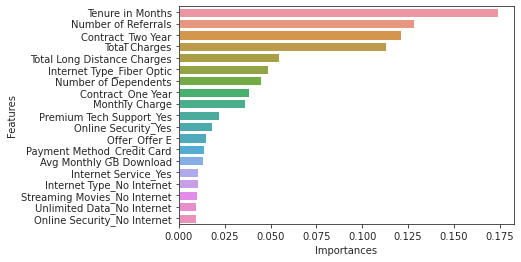

In [265]:
#pd.DataFrame(rfc.feature_importances_,x_train.columns).sort_values(0)
sns.barplot(y = 'Features',
            x = 'Importances',
            data = features_important[:19])

In [266]:
colsRequired = features_important['Features'][:9]
colsRequired = list(colsRequired)
colsRequired

['Tenure in Months',
 'Number of Referrals',
 'Contract_Two Year',
 'Total Charges',
 'Total Long Distance Charges',
 'Internet Type_Fiber Optic',
 'Number of Dependents',
 'Contract_One Year',
 'Monthly Charge']

In [267]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_test_pred)
roc_auc=metrics.auc(fpr,tpr)

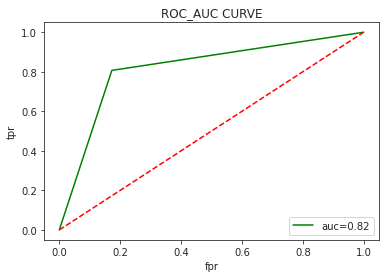

In [268]:
import matplotlib.pyplot as plt
plt.title("ROC_AUC CURVE")
plt.plot(fpr,tpr,'g',label='auc=%0.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend(loc='lower right')

### GRID SEARCH CV

In [ ]:
### Random forest classifier

In [1113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf= RandomForestClassifier(random_state=42)

In [1114]:

params_dt = {'n_estimators':[100,300,800],
             'max_depth' : [20,30,25,12,5],
             'min_samples_leaf' : [.04,0.01,0.01],
             'class_weight':[{0: 0.25, 1: 0.75},{0: 0.20, 1: 0.8},{0: 4 ,1: 9}]
            }

grid_dt = GridSearchCV(estimator=rf,
                       param_grid=params_dt,
                       scoring='f1',
                       cv=5,n_jobs=-1)
grid_dt.fit(x_train,y_train)


KeyboardInterrupt



In [ ]:
best_hyperparams = grid_dt.best_params_
print('Best Hyperparameters: \n', best_hyperparams)

In [ ]:
best_cv_score = grid_dt.best_score_
print('Best_cv_score: \n',best_cv_score)

In [ ]:
best_model = grid_dt.best_estimator_
test_acc = best_model.score(x_test,y_test)
train_acc = best_model.score(x_train,y_train)
print('test_acc :\n', test_acc,'\n' ,'train_acc:\n',train_acc)

In [ ]:
### decision tree classifier

In [ ]:
## decision tree parameters
params_dt = {'max_depth' : [2,10,5,6,15,20],
             'min_samples_leaf' : [.04,0.08,0.01,0.02,0.1,0.001],
             'max_features' : [0.3,0.6,0.9,0.1,0.001],
             'class_weight':[{0: 0.25, 1: 0.75},{0: 4, 1: 9},{0: 0.35, 1: 0.68},{0: .20, 1: .8},{0: 45, 1: 55}]
            }

grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='f1',
                       cv=5,n_jobs=-1)
grid_dt.fit(x_train,y_train)

In [ ]:
best_hyperparams = grid_dt.best_params_
print('Best Hyperparameters: \n', best_hyperparams)

In [ ]:
best_cv_score = grid_dt.best_score_
print('Best_cv_score: \n',best_cv_score)

In [ ]:
best_model = grid_dt.best_estimator_
train_acc = best_model.score(x_train,y_train)
test_acc = best_model.score(x_test,y_test)
print('test_acc :\n', test_acc,'\n' ,'train_acc:\n',train_acc)

### UI 

In [1702]:
!pip install gradio

In [1703]:
import gradio as gr

In [1704]:
import pickle

In [1705]:
with open("filename.pkl", "wb") as f:
    pickle.dump(rfc, f)  

In [1712]:
a=x_test.iloc[:5],y_test[:5],y_test_pred[:5]
print(a)

(      Tenure in Months  Number of Referrals  Contract_Two Year  Total Charges  \
4865          0.169014             0.090909                0.0       0.070915   
6442          0.112676             0.090909                0.0       0.097733   
3470          0.915493             0.000000                1.0       0.481719   
781           0.549296             0.181818                0.0       0.083828   
2732          0.098592             0.909091                0.0       0.049273   

      Number of Dependents  Contract_One Year  Internet Type_Fiber Optic  
4865              0.000000                0.0                        0.0  
6442              0.000000                0.0                        1.0  
3470              0.000000                0.0                        0.0  
781               0.111111                0.0                        0.0  
2732              0.000000                0.0                        0.0  , 4865    1.0
6442    1.0
3470    0.0
781     0.0
2732    0.0
N

In [1707]:
def make_prediction(age_input, Dependent_input, referal_input,
       Tenure_input, long_dist_charge_input,avg_data_down_input, month_charges_input):
    with open("filename.pkl", "rb") as f:
        lr  = pickle.load(f)
        preds = lr.predict([[age_input, Dependent_input, referal_input,
       Tenure_input, long_dist_charge_input,avg_data_down_input, month_charges_input]])
        if preds==1.0:
            return('😯 Cutomer is likely to churn')
        return ('😉 Cutomer is not likely to churn')

In [1708]:
if make_prediction(0,0,0,0,0,0,0) == 0.0:
    print('hi')

In [1709]:
make_prediction(0.377,0,0,0.549,0.457,0,0.23)

'😉 Cutomer is not likely to churn'

In [1710]:
from IPython.display import display, HTML
display(HTML("<style>.container { height:100% !important; }</style>"))
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-height:100% !important; }</style>"))
display(HTML("<style>.prompt { display:none !important; }</style>"))


In [1715]:


#Create the input component for Gradio since we are expecting 4 inputs

Tenure_input = gr.Number(label = "Enter tenure in months")
referral_input = gr.Number(label = "Enter No of referral")
Contract2_year_input = gr.Number(label = "Does customer had 2 year contract:")
Total_charges_input = gr.Number(label='Enter Total Charges')
Dependent_input = gr.Number(label='Does person has any dependent')
Contract1_year_input = gr.Number(label='Does customer had 1 year contract')
Fibre_optic_input = gr.Number(label='Does person has fiber optic as Internet Type')

# We create the output
output = gr.Textbox()


app = gr.Interface(fn = make_prediction, inputs=[Tenure_input, referral_input, Contract2_year_input,
                                                 Total_charges_input, Dependent_input, Contract1_year_input, Fibre_optic_input],
        outputs=output,title=('Customer Churn Prediction'),
        description=('The bot is designed to predict whether customer is going to churn or not by giving some required inputs')
        ,css="body {background-image: url('file=Prediction.png')}")
app.launch(share=True)

Running on local URL:  http://127.0.0.1:7863
Running on public URL: https://46248eb854ce2ad1.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
